<h1>Proyek UTS IBDA2032 - Kecerdasan Buatan</h1>

<font size="4"><b>Anggota :</b></font>

<font size="3">
<ul>
<li>Darren Nathaniel Rusly (10101190104)</li>
<li>Jose Alfred Benaya (10101190377)</li>
<li>Reszisca Valentiana (10101190702)</li>
</ul>
</font>

<h1> No. 1</h1>

<font size='3'>Akan dilakukan pembuatan tiga model regresi linear berdasarkan kasus Positif Harian (Jakarta) dalam data Covid-19 Jakarta yang akan dibedakan berdasarkan tanggal kasus kejadiannya.

Pengerjaan model machine learning yang digunakan dalam project ini akan dibuat adalah berdasarkan modul Scikit-learn dalam bahasa pemrograman Python.</font>

<h2>Mengambil data</h2>

<font face="verdana">Menyematkan link dataset agar selalu mendapatkan dataset yang up to date setiap hari dari sumbernya</font>

In [80]:
import pandas as pd

In [81]:
dataset1 = pd.read_excel('https://tiny.cc/Datacovidjakarta', sheet_name='Data Indonesia dan Jakarta')
dataset1.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2


<h2>Melakukan penelusuran data</h2>

<font face="verdana">Langkah berikutnya adalah melalukan pengecekan untuk nilai kosong (null) dalam dataset. Dapat terlihat bahwa tidak ada data yang missing (null) pada dataset dengan sheet "Data Indonesia dan Jakarta". Artinya, kita dapat melewati tahap penanganan data yang hilang.</font>

In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          407 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            407 non-null    int64         
 2   Sembuh (Indonesia)               407 non-null    int64         
 3   Dirawat (Indonesia)              407 non-null    int64         
 4   Positif (Indonesia)              407 non-null    int64         
 5   Meninggal (Jakarta)              407 non-null    int64         
 6   Sembuh (Jakarta)                 407 non-null    int64         
 7   Self-Isolation (Jakarta)         407 non-null    int64         
 8   Dirawat (Jakarta)                407 non-null    int64         
 9   Positif (Jakarta)                407 non-null    int64         
 10  Positif Aktif (Jakarta)          407 non-null    int64        

<font face="verdana">Melihat hubungan atau keterkaitan antar fitur dengan matriks korelasi. Selanjutnya akan ditinjau kolom-kolom yang berkorelasi dengan kolom Positif Harian (Jakarta)</font>

In [4]:
corr_matrix = dataset1.corr()
corr_matrix

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
Meninggal (Indonesia),1.000000,0.994001,0.937223,0.996946,0.998280,0.993129,0.480550,0.690280,0.996227,0.573823,0.760703,0.879180,-0.166052,0.792361,0.687495,0.729236,-0.106081,-0.037193,0.716711,-0.127042
Sembuh (Indonesia),0.994001,1.000000,0.907622,0.998908,0.994145,0.999623,0.401492,0.647849,0.998846,0.499040,0.714526,0.842859,-0.202297,0.744051,0.655683,0.687278,-0.114066,-0.039300,0.666997,-0.136184
Dirawat (Indonesia),0.937223,0.907622,1.000000,0.926231,0.923105,0.909164,0.709659,0.793039,0.924478,0.784969,0.873945,0.965669,-0.029396,0.925256,0.806707,0.865270,-0.104117,-0.022466,0.868324,-0.116147
Positif (Indonesia),0.996946,0.998908,0.926231,1.000000,0.995530,0.998717,0.439795,0.670095,0.999741,0.535737,0.738968,0.864298,-0.184807,0.771120,0.678334,0.713335,-0.113810,-0.037809,0.695553,-0.135024
Meninggal (Jakarta),0.998280,0.994145,0.923105,0.995530,1.000000,0.993410,0.449401,0.675915,0.995154,0.545007,0.739525,0.859438,-0.181930,0.767546,0.668927,0.704722,-0.107011,-0.040403,0.688958,-0.129911
Sembuh (Jakarta),0.993129,0.999623,0.909164,0.998717,0.993410,1.000000,0.399202,0.647957,0.999111,0.497243,0.713810,0.844423,-0.206723,0.743953,0.662507,0.691171,-0.120374,-0.043320,0.666705,-0.144837
Self-Isolation (Jakarta),0.480550,0.401492,0.709659,0.439795,0.449401,0.399202,1.000000,0.652715,0.436690,0.977922,0.750649,0.765552,0.283776,0.843342,0.649437,0.771197,0.033402,0.032148,0.854315,0.052438
Dirawat (Jakarta),0.690280,0.647849,0.793039,0.670095,0.675915,0.647957,0.652715,1.000000,0.670417,0.796620,0.746550,0.789330,0.019958,0.772602,0.709657,0.795140,-0.163325,0.072040,0.792215,-0.116916
Positif (Jakarta),0.996227,0.998846,0.924478,0.999741,0.995154,0.999111,0.436690,0.670417,1.000000,0.533349,0.735019,0.863405,-0.190277,0.768248,0.680351,0.714162,-0.118104,-0.040055,0.693538,-0.140616
Positif Aktif (Jakarta),0.573823,0.499040,0.784969,0.535737,0.545007,0.497243,0.977922,0.796620,0.533349,1.000000,0.804852,0.828542,0.231925,0.885995,0.713920,0.834649,-0.018399,0.045521,0.900161,0.009590


In [5]:
corr_matrix['Positif Harian (Jakarta)'].sort_values(ascending=False)

Positif Harian (Jakarta)           1.000000
Positif Harian (Indonesia)         0.932739
Positif Aktif (Jakarta)            0.900161
Sembuh Harian (Indonesia)          0.885189
Sembuh Harian (Jakarta)            0.873511
Dirawat (Indonesia)                0.868324
Self-Isolation (Jakarta)           0.854315
Meninggal Harian (Indonesia)       0.824497
Dirawat (Jakarta)                  0.792215
Meninggal Harian (Jakarta)         0.782027
Meninggal (Indonesia)              0.716711
Positif (Indonesia)                0.695553
Positif (Jakarta)                  0.693538
Meninggal (Jakarta)                0.688958
Sembuh (Indonesia)                 0.666997
Sembuh (Jakarta)                   0.666705
Dirawat Harian (Indonesia)         0.211015
Positif Aktif Harian (Jakarta)     0.120029
Dirawat Harian (Jakarta)           0.116138
Self-Isolation Harian (Jakarta)    0.050150
Name: Positif Harian (Jakarta), dtype: float64

<font face="verdana">Membagi dataset menjadi tiga yang dibedakan berdasarkan Tanggal sesuai dengan permintaan pada soal</font>

In [6]:
X_1 = dataset1
X_2 = dataset1[dataset1['Tanggal'] >= '2021-01-01']
X_3 = dataset1[dataset1['Tanggal'] >= '2021-02-09']

Y_1 = X_1.iloc[:,19].values
Y_2 = X_2.iloc[:,19].values
Y_3 = X_3.iloc[:,19].values

<h2>Encoding</h2>

<font face="verdana">Sebelum mengolah data lebih lanjut, harus dipastikan tipe data pada dataset bersifat homogen. Pada kasus ini, kolom Tanggal memiliki tipe data yang tidak seragam dengan yang lainnya, yaitu berupa datetime. Oleh sebab itu, akan dilakukan proses encode dengan OrdinalEncoder agar nilai kolom Tanggal menjadi nilai yang kontinu. Ini juga membantu ketika proses visualisasi data. </font>

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

Tanggal_encoded = encoder.fit_transform(X_1[['Tanggal']])
Tanggal_encoded_2 = encoder.fit_transform(X_2[['Tanggal']])
Tanggal_encoded_3 = encoder.fit_transform(X_3[['Tanggal']])

X_1 = Tanggal_encoded
X_2 = Tanggal_encoded_2
X_3 = Tanggal_encoded_3

<h2>Visualisasi data</h2>

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True)
regressor_2 = LinearRegression(fit_intercept=True)
regressor_3 = LinearRegression(fit_intercept=True)

regressor.fit(X_1, Y_1)
regressor_2.fit(X_2, Y_2)
regressor_3.fit(X_3, Y_3)

LinearRegression()

<font face="verdana">Membuat model regresi linear dari dataset yang dimulai dari 1 Maret 2020 (sejak kasus pertama)</font>

In [9]:
Y_pred_1 = regressor.predict(X_1)

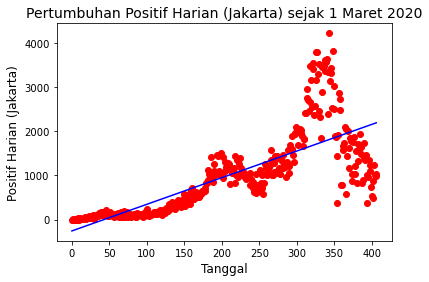

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_1, Y_1, color = 'red')
plt.plot(X_1, Y_pred_1, color='blue')
plt.title('Pertumbuhan Positif Harian (Jakarta) sejak 1 Maret 2020', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana">Membuat model regresi linear dari dataset yang dimulai dari 1 Januari 2021 (sejak awal tahun 2021)</font>

In [11]:
Y_pred_2 = regressor_2.predict(X_2)

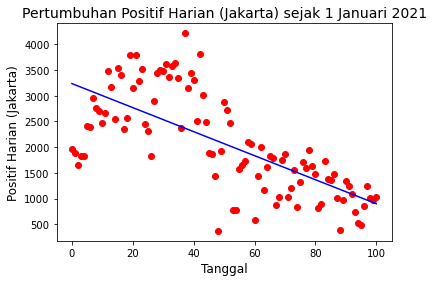

In [12]:
plt.scatter(X_2, Y_2, color = 'red')
plt.plot(X_2, Y_pred_2, color='blue')
plt.title('Pertumbuhan Positif Harian (Jakarta) sejak 1 Januari 2021', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana">Membuat model regresi linear dari dataset yang dimulai dari 9 Februari 2021 (sejak diadakan PPKM jilid 2)</font>

In [13]:
Y_pred_3 = regressor_3.predict(X_3)

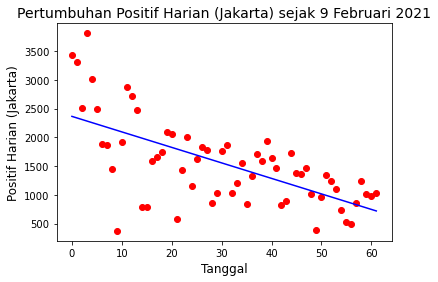

In [14]:
plt.scatter(X_3, Y_3, color = 'red')
plt.plot(X_3, Y_pred_3, color = 'blue')
plt.title('Pertumbuhan Positif Harian (Jakarta) sejak 9 Februari 2021', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana">Mengkalkulasi skor dari ketiga model di atas</font>

In [15]:
print('Skor model 1:', regressor.fit(X_1, Y_1).score(X_1, Y_1), '\n',
      'Skor model 2:', regressor_2.fit(X_2, Y_2).score(X_2, Y_2), '\n',
      'Skor model 3:', regressor_3.fit(X_3, Y_3).score(X_3, Y_3))

Skor model 1: 0.5853364237701408 
 Skor model 2: 0.4888164719072181 
 Skor model 3: 0.4190692641309548


<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Formula dasar untuk regresi linear adalah $y = mx + b$ dengan $m$ disebut gradien atau kemiringan garis. <br><br>Semakin besar (+) nilai $m$, maka kemiringan garis semakin mendekati sumbu-$y$ dari kiri bawah dan kanan atas. Semakin kecil (-) nilai $m$, maka kemiringan garis semakin mendekati sumbu-$y$ dari kiri atas dan kanan bawah. Ketika $m$ bernilai 0, maka garis linear sejajar dengan sumbu-$x$. Ketika $m$ bernilai sangat besar atau sangat kecil, garis linear hampir sejajar dengan sumbu-$y$.<br><br>

Untuk data Pertumbuhan Positif Harian (Jakarta) sejak 1 Maret 2020, model machine learning menggambarkan sebuah garis linear yang mengarah dari kiri bawah ke kanan atas (terjadi pertumbuhan). Artinya nilai $m$ pada formula regresi linear model ini bernilai positif.<br><br>

Untuk data Pertumbuhan Positif Harian (Jakarta) sejak 1 Januari 2021 dan 9 Februari 2021, model machine learning menggambarkan sebuah garis linear yang mengarah dari kiri atas ke kanan bawah (terjadi penurunan). Artinya nilai $m$ pada formula regresi linear model ini bernilai negatif. 

<h2>Membuat prediksi</h2>

<font face="verdana">Model untuk memprediksi kasus Covid-19 pada kolom Positif Harian (Jakarta) untuk 2 minggu ke depan berdasarkan model pertama yang dimulai dari 1 Maret 2020 (sejak kasus pertama).

Akan dibuat sebuah variable input X_4 sebagai input prediksi kejadian 2 minggu ke depan. Untuk ini, dapat dilakukan penambahan 14 nilai (yang berarti 14 hari) berdasarkan nilai terakhir (hari terakhir) dari dataset.</b></font>

In [84]:
num = X_3[-1][0]
X_4 = []
for x in range(14):
    num+=1
    X_4.append([num])

In [17]:
Y_pred_4 = regressor.predict(X_4)
Y_pred_4

array([115.26670313, 121.2904446 , 127.31418607, 133.33792755,
       139.36166902, 145.38541049, 151.40915196, 157.43289343,
       163.4566349 , 169.48037637, 175.50411785, 181.52785932,
       187.55160079, 193.57534226])

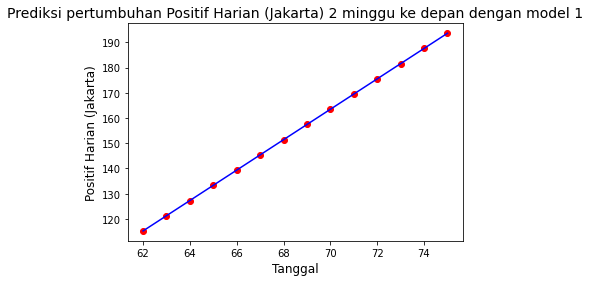

In [18]:
plt.scatter(X_4, Y_pred_4, color = 'red')
plt.plot(X_4, Y_pred_4, color = 'blue')
plt.title('Prediksi pertumbuhan Positif Harian (Jakarta) 2 minggu ke depan dengan model 1', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana">Model untuk memprediksi kasus Covid-19 pada kolom Positif Harian (Jakarta) untuk 2 minggu ke depan berdasarkan model pertama yang dimulai dari 1 Januari 2021 (sejak awal tahun 2021)</font>

In [19]:
Y_pred_5 = regressor_2.predict(X_4)
Y_pred_5

array([1787.86923704, 1764.52913221, 1741.18902737, 1717.84892254,
       1694.50881771, 1671.16871287, 1647.82860804, 1624.4885032 ,
       1601.14839837, 1577.80829354, 1554.4681887 , 1531.12808387,
       1507.78797903, 1484.4478742 ])

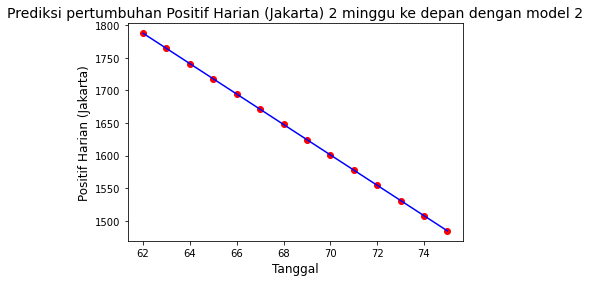

In [20]:
plt.scatter(X_4, Y_pred_5, color = 'red')
plt.plot(X_4, Y_pred_5, color = 'blue')
plt.title('Prediksi pertumbuhan Positif Harian (Jakarta) 2 minggu ke depan dengan model 2', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana">Model untuk memprediksi kasus Covid-19 pada kolom Positif Harian (Jakarta) untuk 2 minggu ke depan berdasarkan model pertama yang dimulai dari 9 Februari 2021 (sejak diadakan PPKM jilid 2)</font>

In [21]:
Y_pred_6 = regressor_3.predict(X_4)
Y_pred_6

array([693.42147012, 666.46966835, 639.51786659, 612.56606482,
       585.61426305, 558.66246128, 531.71065951, 504.75885775,
       477.80705598, 450.85525421, 423.90345244, 396.95165068,
       369.99984891, 343.04804714])

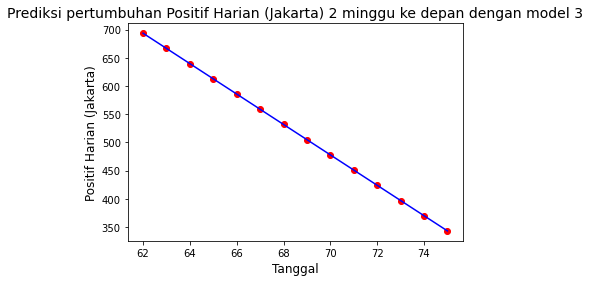

In [22]:
plt.scatter(X_4, Y_pred_6, color = 'red')
plt.plot(X_4, Y_pred_6, color = 'blue')
plt.title('Prediksi pertumbuhan Positif Harian (Jakarta) 2 minggu ke depan dengan model 3', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Positif Harian (Jakarta)', fontsize=12)
plt.show()

<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Berdasarkan skor model yang telah dikalkulasi, model yang memiliki skor tertinggi adalah model pertama yang menggunakan data sejak 1 Maret 2020. Melihat dari visualisasi prediksi pertumbuhan Positif Harian (Jakarta) 2 minggu ke depan, grafik linear menggambarkan adanya pertumbuhan.

Dengan kata lain, model ini memprediksi adanya pertumbuhan pada Positif Harian (Jakarta) dalam kurun waktu 2 minggu ke depan dari hari ini.

<h1>No. 2</h1>

<h2>Mengambil data</h2>

<font face="verdana">Akan dilakukan pembuatan scatter plot matrix dan nilai korelasi untuk dataset berikut.

Membaca dataset dengan sheet yang bernama 'RDT Ag' dan menyimpannya ke dalam variabel "dataset2".</font>

In [23]:
dataset2 = pd.read_excel('https://tiny.cc/Datacovidjakarta', sheet_name='RDT Ag')
dataset2.head()

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,...,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
1,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,1192,76,1116,0.0637584,1192,76,1116,0.0637584
2,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1192,76,1116,0.0637584
3,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,607,24,583,0.0395387,1799,100,1699,0.0555864
4,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1799,100,1699,0.0555864


<font face="verdana">Melakukan pengecekan terhadap nilai null/kosong dalam dataset2 seperti pada langkah 1 yang menganalisis dataset1.</font>

In [24]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No.                102 non-null    float64
 1   EIS                103 non-null    object 
 2   Unnamed: 2         103 non-null    object 
 3   Unnamed: 3         103 non-null    object 
 4   Unnamed: 4         103 non-null    object 
 5   Unnamed: 5         103 non-null    object 
 6   NAR                103 non-null    object 
 7   Unnamed: 7         103 non-null    object 
 8   Unnamed: 8         103 non-null    object 
 9   Unnamed: 9         103 non-null    object 
 10  Excel              103 non-null    object 
 11  Unnamed: 11        103 non-null    object 
 12  Unnamed: 12        103 non-null    object 
 13  Unnamed: 13        103 non-null    object 
 14  Total DKI Jakarta  103 non-null    object 
 15  Unnamed: 15        103 non-null    object 
 16  Unnamed: 16        103 non

<font face="verdana">Menghapus baris pertama dari setiap kolom yang nilainya tidak valid karena berisikan nama kolom</font>

In [25]:
dataset2 = dataset2.drop([0])

<font face="verdana">Jika dilihat seksama, pada kolom Unnamed: 17 terdapat data yang berisi "#DIV/0!". Hal tersebut disebabkan karena terdapat kesalahan pembacaan dataset ketika suatu data numerikal dibagi dengan 0. Maka nilai kolom tersebut akan direplace dengan 0</font>

In [26]:
dataset2['Unnamed: 17'].replace('#DIV/0!', 0, inplace=True)

<font face="verdana">Mengubah format data pada kolom EIS yang berisi tanggal menjadi bentuk format "Tahun-Bulan-Hari" (YYYY-MM-DD)</font>

In [27]:
dataset2['EIS'] = pd.to_datetime(dataset2['EIS'], format='%Y%m%d')

<font face="verdana">Membagi dataset menjadi train set dan test set untuk kedua dataset. Train set terdiri dari data 5 Maret 2021 sampai 5 April 2021, sedangkan test set terdiri dari data 6 April 2021 sampai 13 April 2021. </br></br>
Kemudian digabungkan kolom Tes Harian, Positif Harian, Positivity Rate dari dataset RDT Ag dengan Positif Harian (Jakarta) dari dataset Data Indonesia dan Jakarta</font>

In [28]:
train_dataset_1 = dataset1[(dataset1['Tanggal'] >= '2021-03-05') & (dataset1['Tanggal'] <= '2021-04-05')].reset_index(drop=True)
test_dataset_1 = dataset1[(dataset1['Tanggal'] >= '2021-04-06') & (dataset1['Tanggal'] <= '2021-04-13')].reset_index(drop=True)

train_dataset_2 = dataset2[(dataset2['EIS'] >= '2021-03-05') & (dataset2['EIS'] <= '2021-04-05')].reset_index(drop=True)
test_dataset_2 = dataset2[(dataset2['EIS'] >= '2021-04-06') & (dataset2['EIS'] <= '2021-04-13')].reset_index(drop=True)

positif_harian_train = train_dataset_1['Positif Harian (Jakarta)']
merged_dataset_1_train = train_dataset_2.iloc[0:, [14, 15, 17]]
merged_dataset_1_train['Positif Harian (Jakarta)'] = positif_harian_train

positif_harian_test = test_dataset_1['Positif Harian (Jakarta)']
merged_dataset_1_test = test_dataset_2.iloc[0:, [14, 15, 17]]
merged_dataset_1_test['Positif Harian (Jakarta)'] = positif_harian_test

merged_dataset_1_test

,Total DKI Jakarta,Unnamed: 15,Unnamed: 17,Positif Harian (Jakarta)
0,4373,75,0.017151,487.0
1,3665,74,0.020191,862.0
2,4306,96,0.022294,1239.0
3,4619,104,0.022516,1013.0
4,4081,65,0.015927,977.0
5,2550,59,0.023137,1031.0
6,1811,49,0.027057,NaN


<font face="verdana">Terdapat beberapa kolom yang tidak memiliki nama, maka nama kolom-kolom tersebut akan diisi untuk menghindari ambiguitas</font>

In [29]:
merged_dataset_1_train = merged_dataset_1_train.rename(columns={'Total DKI Jakarta': 'Tes Harian', 'Unnamed: 15': 'Positif Harian', 'Unnamed: 17': 'Positivity Rate Harian'})
merged_dataset_1_test = merged_dataset_1_test.rename(columns={'Total DKI Jakarta': 'Tes Harian', 'Unnamed: 15': 'Positif Harian', 'Unnamed: 17': 'Positivity Rate Harian'})
merged_dataset_1_test

,Tes Harian,Positif Harian,Positivity Rate Harian,Positif Harian (Jakarta)
0,4373,75,0.017151,487.0
1,3665,74,0.020191,862.0
2,4306,96,0.022294,1239.0
3,4619,104,0.022516,1013.0
4,4081,65,0.015927,977.0
5,2550,59,0.023137,1031.0
6,1811,49,0.027057,NaN


<font face="verdana">Dapat dilihat bahwa kolom Tes Harian dan Positif Harian bertipe object. Untuk melihat nilai matriks korelasi, data harus bertipe integer atau float. Oleh karena itu, tipe data kedua kolom tersebut akan diubah menjadi float</font>

In [30]:
merged_dataset_1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tes Harian                32 non-null     object 
 1   Positif Harian            32 non-null     object 
 2   Positivity Rate Harian    32 non-null     float64
 3   Positif Harian (Jakarta)  32 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [31]:
merged_dataset_1_train = merged_dataset_1_train.astype(float)
merged_dataset_1_test = merged_dataset_1_test.astype(float)
merged_dataset_1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tes Harian                32 non-null     float64
 1   Positif Harian            32 non-null     float64
 2   Positivity Rate Harian    32 non-null     float64
 3   Positif Harian (Jakarta)  32 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


<font face="verdana">Menampilkan matriks korelasi antar fitur dengan bantuan heatmap dari library seaborn</font>

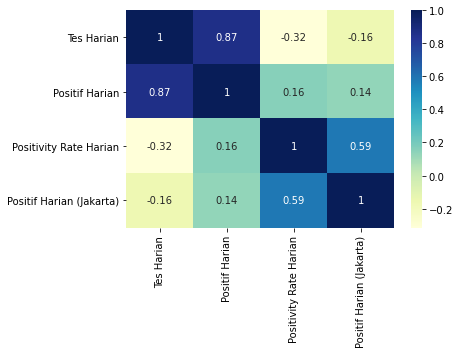

In [32]:
import seaborn as sns

corr_mat = merged_dataset_1_train.corr()
dataplot = sns.heatmap(corr_mat, cmap="YlGnBu", annot=True)
plt.show()

<font face="verdana">Menampilkan scatter plot matrix dari dataset merged_dataset_1_train</font>

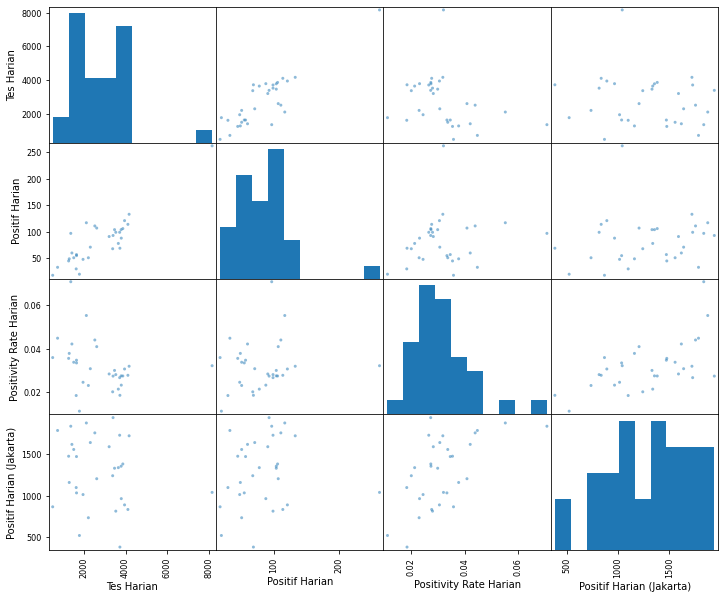

In [33]:
from pandas.plotting import scatter_matrix

attributes = ['Tes Harian', 'Positif Harian', 'Positivity Rate Harian', 'Positif Harian (Jakarta)']
scatter_matrix(merged_dataset_1_train[attributes], figsize=(12, 10))

In [34]:
corr_mat['Positif Harian (Jakarta)'].sort_values(ascending=True)

Tes Harian                 -0.156879
Positif Harian              0.135881
Positivity Rate Harian      0.588750
Positif Harian (Jakarta)    1.000000
Name: Positif Harian (Jakarta), dtype: float64

<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Berdasarkan matriks korelasi dan scatter plot matrix, variabel yang memiliki korelasi terbesar terhadap pertumbuhan Positif Harian (Jakarta) adalah kolom Positivity Rate Harian dengan nilai 0.5887.

<font face="verdana">Membaca dataset dengan sheet yang bernama 'Vaksinasi' dan menyimpannya ke dalam variabel dataset3</font>

In [35]:
dataset3 = pd.read_excel('https://tiny.cc/Datacovidjakarta', sheet_name='Vaksinasi')
dataset3.head()

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Sasaran Total DKI Jakarta: 8.815.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tanggal,DKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Tenaga Kesehatan,NaN,NaN,NaN,NaN,Lansia,NaN,NaN,NaN,...,Pelayan Publik,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN
3,NaN,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,...,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224


<font face="verdana">Menghapus baris 0 sampai 3 yang nilainya tidak valid karena berisi nama kolom</font>

In [36]:
dataset3 = dataset3.drop([0, 1, 2, 3])
dataset3.head()

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,6 Maret 2021,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,7 Maret 2021,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,8 Maret 2021,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,9 Maret 2021,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853


<font face="verdana">Terdapat beberapa kolom yang tidak memiliki nama, maka nama kolom-kolom tersebut akan diisi untuk menghindari ambiguitas yang memudahkan pengakses untuk mengidentifikasi fitur-fitur dalam dataset.

Selanjutnya lakukan pengecekan juga untuk nilai null/kosong dalam dataset3.</font>

In [37]:
dataset3 = dataset3.rename(columns={'Sasaran Total Indonesia: 181.554.465': 'Tanggal', 'Unnamed: 1': 'Data (Tenaga Kesehatan)', 'Unnamed: 2': 'Vaksinasi 1 (Tenaga Kesehatan)', 'Unnamed: 3': 'Vaksinasi 2 (Tenaga Kesehatan)', 'Unnamed: 4': 'Persentase 1 (Tenaga Kesehatan)', 'Unnamed: 5': 'Persentase 2 (Tenaga Kesehatan)', 'Unnamed: 6': 'Data (Lansia)', 'Unnamed: 7': 'Vaksinasi 1 (Lansia)', 'Unnamed: 8': 'Vaksinasi 2 (Lansia)', 'Unnamed: 9': 'Persentase 1 (Lansia)', 'Unnamed: 10': 'Persentase 2 (Lansia)', 'Unnamed: 11': 'Data (Pelayan Publik)', 'Unnamed: 12': 'Vaksinasi 1 (Pelayan Publik)', 'Unnamed: 13': 'Vaksinasi 2 (Pelayan Publik)', 'Unnamed: 14': 'Persentase 1 (Pelayan Publik)', 'Unnamed: 15': 'Persentase 2 (Pelayan Publik)', 'Unnamed: 16': 'Data (Total)', 'Unnamed: 17': 'Vaksinasi 1 (Total)', 'Unnamed: 18': 'Vaksinasi 2 (Total)', 'Unnamed: 19': 'Persentase 1 (Total)', 'Unnamed: 20': 'Persentase 2 (Total)'})
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 4 to 42
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Tanggal                          39 non-null     object
 1   Data (Tenaga Kesehatan)          39 non-null     object
 2   Vaksinasi 1 (Tenaga Kesehatan)   39 non-null     object
 3   Vaksinasi 2 (Tenaga Kesehatan)   39 non-null     object
 4   Persentase 1 (Tenaga Kesehatan)  39 non-null     object
 5   Persentase 2 (Tenaga Kesehatan)  39 non-null     object
 6   Data (Lansia)                    39 non-null     object
 7   Vaksinasi 1 (Lansia)             39 non-null     object
 8   Vaksinasi 2 (Lansia)             39 non-null     object
 9   Persentase 1 (Lansia)            39 non-null     object
 10  Persentase 2 (Lansia)            39 non-null     object
 11  Data (Pelayan Publik)            39 non-null     object
 12  Vaksinasi 1 (Pelayan Publik)     39 no

<font face="verdana">Dapat dilihat bahwa kolom Tanggal bertipe object. Agar memudahkan pengolahan data, tipe data dari kolom tersebut perlu diubah terlebih dahulu menjadi datetime menurut format tanggal yang tersedia</font>

In [38]:
date = 1
month = '03'
for x in range(len(dataset3)):
    if date > 31:
        date = 1
        month = '04'
    if date < 10:
        tanggal = f'2021/{month}/0{date}'
    else:
        tanggal = f'2021/{month}/{date}'
    dataset3['Tanggal'][x] = tanggal
    date += 1

In [39]:
dataset3['Tanggal'] = pd.to_datetime(dataset3['Tanggal'], format='%Y/%m/%d')
dataset3

,Tanggal,Data (Tenaga Kesehatan),Vaksinasi 1 (Tenaga Kesehatan),Vaksinasi 2 (Tenaga Kesehatan),Persentase 1 (Tenaga Kesehatan),Persentase 2 (Tenaga Kesehatan),Data (Lansia),Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
4,2021-03-05,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,2021-03-06,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,2021-03-07,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,2021-03-08,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,2021-03-09,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853
9,2021-03-10,112301,116791,90681,1.03998,0.807482,911631,154251,1100,0.169203,...,17327169,1682896,119495,0.0971247,0.00689639,40349051,3572519,1249822,0.0885403,0.0309753
10,2021-03-11,112301,116823,90693,1.04027,0.807589,911631,154915,1103,0.169932,...,17327169,1767209,144689,0.101991,0.00835041,40349051,3696059,1295615,0.0916021,0.0321102
11,2021-03-12,112301,118086,91521,1.05151,0.814962,911631,167086,1291,0.183282,...,17327169,1767209,144689,0.101991,0.00835041,40349051,3696059,1295615,0.0916021,0.0321102
12,2021-03-13,112301,118283,91748,1.05327,0.816983,911631,174327,1444,0.191225,...,17327169,1947195,278954,0.112378,0.0160992,40349051,3985596,1454836,0.0987779,0.0360563
13,2021-03-14,112301,118301,91764,1.05343,0.817125,911631,179024,1444,0.196378,...,17327169,1967948,282844,0.113576,0.0163237,40349051,4020124,1460222,0.0996337,0.0361897


<font face="verdana">Didapati bahwa dataset3 memiliki sebanyak 16 fitur. Oleh sebab itu, diputuskan untuk membaginya menjadi 4 dataset dengan 1 dataset berisi 4 kolom atau fitur agar lebih mudah diinterpretasi dan memudahkan tahap visualisasi. Proses pembagian dikategorikan berdasarkan section Tenaga Kesehatan, Lansia, Pelayan Publik, dan Total.</font>

In [40]:
train_dataset_3 = dataset3[(dataset3['Tanggal'] >= '2021-03-05') & (dataset3['Tanggal'] <= '2021-04-05')].reset_index(drop=True)
test_dataset_3 = dataset3[(dataset3['Tanggal'] >= '2021-04-06') & (dataset3['Tanggal'] <= '2021-04-13')].reset_index(drop=True)

merged_dataset_2_complete_train = train_dataset_3.iloc[0:,[2,3,4,5,7,8,9,10,12,13,14,15,17,18,19,20]]
merged_dataset_2_1_train = train_dataset_3.iloc[0:, [2, 3, 4, 5]]
merged_dataset_2_2_train = train_dataset_3.iloc[0:, [7, 8, 9, 10]]
merged_dataset_2_3_train = train_dataset_3.iloc[0:, [12, 13, 14, 15]]
merged_dataset_2_4_train = train_dataset_3.iloc[0:, [17, 18, 19, 20]]
merged_dataset_2_complete_train['Positif Harian (Jakarta)'] = positif_harian_train
merged_dataset_2_1_train['Positif Harian (Jakarta)'] = positif_harian_train
merged_dataset_2_2_train['Positif Harian (Jakarta)'] = positif_harian_train
merged_dataset_2_3_train['Positif Harian (Jakarta)'] = positif_harian_train
merged_dataset_2_4_train['Positif Harian (Jakarta)'] = positif_harian_train
merged_dataset_2_complete_train = merged_dataset_2_complete_train.astype(float)
merged_dataset_2_1_train = merged_dataset_2_1_train.astype(float)
merged_dataset_2_2_train = merged_dataset_2_2_train.astype(float)
merged_dataset_2_3_train = merged_dataset_2_3_train.astype(float)
merged_dataset_2_4_train = merged_dataset_2_4_train.astype(float)

merged_dataset_2_complete_test = test_dataset_3.iloc[0:,[2,3,4,5,7,8,9,10,12,13,14,15,17,18,19,20]]
merged_dataset_2_1_test = test_dataset_3.iloc[0:, [2, 3, 4, 5]]
merged_dataset_2_2_test = test_dataset_3.iloc[0:, [7, 8, 9, 10]]
merged_dataset_2_3_test = test_dataset_3.iloc[0:, [12, 13, 14, 15]]
merged_dataset_2_4_test = test_dataset_3.iloc[0:, [17, 18, 19, 20]]
merged_dataset_2_complete_test['Positif Harian (Jakarta)'] = positif_harian_test
merged_dataset_2_1_test['Positif Harian (Jakarta)'] = positif_harian_test
merged_dataset_2_2_test['Positif Harian (Jakarta)'] = positif_harian_test
merged_dataset_2_3_test['Positif Harian (Jakarta)'] = positif_harian_test
merged_dataset_2_4_test['Positif Harian (Jakarta)'] = positif_harian_test
merged_dataset_2_complete_test = merged_dataset_2_complete_test.astype(float)
merged_dataset_2_1_test = merged_dataset_2_1_test.astype(float)
merged_dataset_2_2_test = merged_dataset_2_2_test.astype(float)
merged_dataset_2_3_test = merged_dataset_2_3_test.astype(float)
merged_dataset_2_4_test = merged_dataset_2_4_test.astype(float)

merged_dataset_2_complete_test

,Vaksinasi 1 (Tenaga Kesehatan),Vaksinasi 2 (Tenaga Kesehatan),Persentase 1 (Tenaga Kesehatan),Persentase 2 (Tenaga Kesehatan),Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),Persentase 2 (Lansia),Vaksinasi 1 (Pelayan Publik),Vaksinasi 2 (Pelayan Publik),Persentase 1 (Pelayan Publik),Persentase 2 (Pelayan Publik),Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total),Positif Harian (Jakarta)
0,122326.0,106437.0,1.089269,0.947783,496569.0,124880.0,0.544704,0.136985,796248.0,349648.0,0.402805,0.176880,1415143.0,580965.0,0.471606,0.193611,487.0
1,122553.0,106800.0,1.091290,0.951016,500370.0,142698.0,0.548873,0.156530,813740.0,369813.0,0.411654,0.187081,1436663.0,619311.0,0.478778,0.206390,862.0
2,123061.0,107175.0,1.095814,0.954355,507667.0,148824.0,0.556878,0.163250,844961.0,388298.0,0.427448,0.196432,1475689.0,644297.0,0.491783,0.214716,1239.0
3,123387.0,107509.0,1.098717,0.957329,516816.0,166705.0,0.566914,0.182865,866503.0,402918.0,0.438346,0.203828,1506706.0,677132.0,0.502120,0.225659,1013.0
4,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,0.574641,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151,977.0
5,123485.0,107583.0,1.099589,0.957988,526687.0,177883.0,0.577741,0.195126,887215.0,412014.0,0.448824,0.208429,1537387.0,697480.0,0.512345,0.232440,1031.0
6,123485.0,107583.0,1.099589,0.957988,526687.0,177883.0,0.577741,0.195126,887215.0,412014.0,0.448824,0.208429,1537387.0,697480.0,0.512345,0.232440,NaN


<font face="verdana">Visualisasi matriks korelasi dan scatter plot matrix untuk merged_dataset_2_1_train berdasarkan section Tenaga Kesehatan</font>

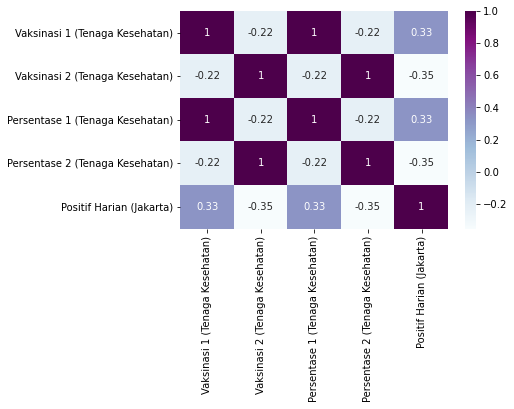

In [41]:
corr_mat_2 = merged_dataset_2_1_train.corr()
dataplot = sns.heatmap(corr_mat_2, cmap="BuPu", annot=True)

In [42]:
corr_mat_2['Positif Harian (Jakarta)'].sort_values(ascending=True)

Vaksinasi 2 (Tenaga Kesehatan)    -0.353885
Persentase 2 (Tenaga Kesehatan)   -0.353885
Vaksinasi 1 (Tenaga Kesehatan)     0.328659
Persentase 1 (Tenaga Kesehatan)    0.328659
Positif Harian (Jakarta)           1.000000
Name: Positif Harian (Jakarta), dtype: float64

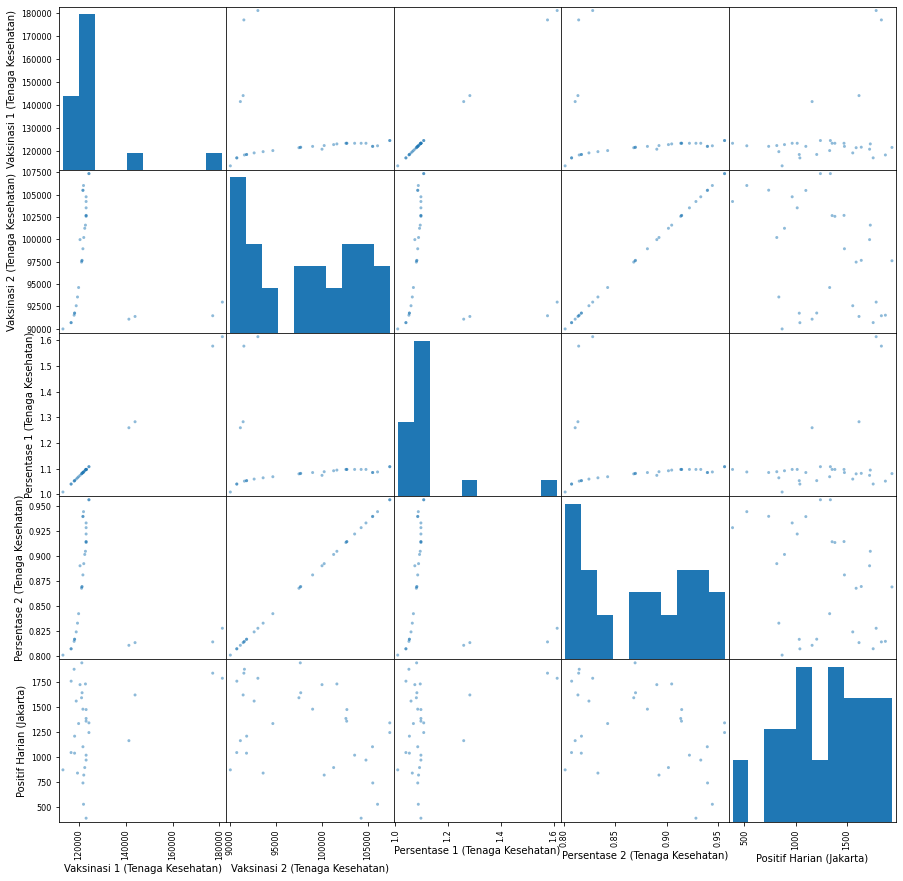

In [43]:
scatter_matrix(merged_dataset_2_1_train, figsize=(15, 15))

<font face="verdana">Visualisasi matriks korelasi dan scatter plot matrix untuk merged_dataset_2_2_train berdasarkan section Lansia</font>

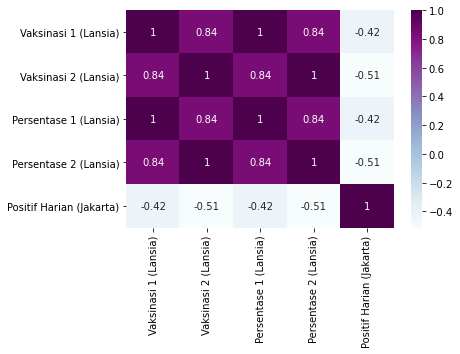

In [44]:
corr_mat_3 = merged_dataset_2_2_train.corr()
dataplot_2 = sns.heatmap(corr_mat_3, cmap="BuPu", annot=True)

In [45]:
corr_mat_3['Positif Harian (Jakarta)'].sort_values(ascending=True)

Persentase 2 (Lansia)      -0.512772
Vaksinasi 2 (Lansia)       -0.512772
Vaksinasi 1 (Lansia)       -0.423823
Persentase 1 (Lansia)      -0.423823
Positif Harian (Jakarta)    1.000000
Name: Positif Harian (Jakarta), dtype: float64

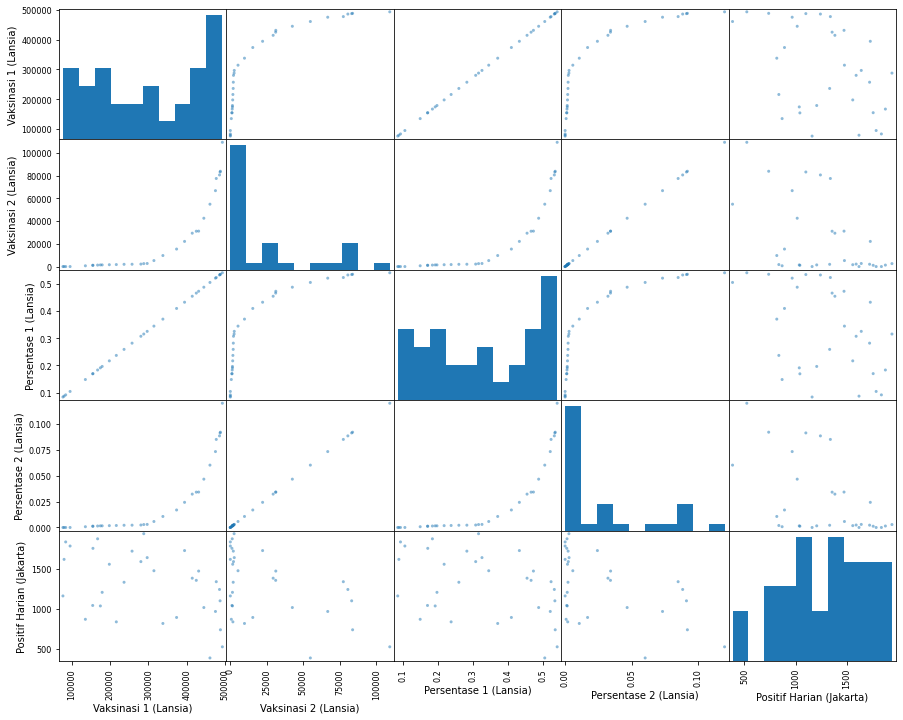

In [46]:
scatter_matrix(merged_dataset_2_2_train, figsize=(15, 12))

<font face="verdana">Visualisasi matriks korelasi dan scatter plot matrix untuk merged_dataset_2_3_train berdasarkan section Pelayan Publik</font>

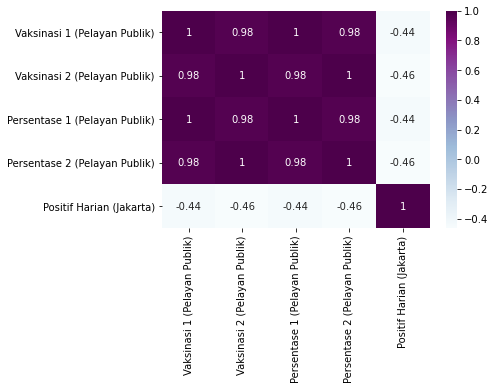

In [47]:
corr_mat_4 = merged_dataset_2_3_train.corr()
dataplot_3 = sns.heatmap(corr_mat_4, cmap="BuPu", annot=True)

In [48]:
corr_mat_4['Positif Harian (Jakarta)'].sort_values(ascending=True)

Persentase 2 (Pelayan Publik)   -0.464284
Vaksinasi 2 (Pelayan Publik)    -0.464284
Vaksinasi 1 (Pelayan Publik)    -0.437271
Persentase 1 (Pelayan Publik)   -0.437271
Positif Harian (Jakarta)         1.000000
Name: Positif Harian (Jakarta), dtype: float64

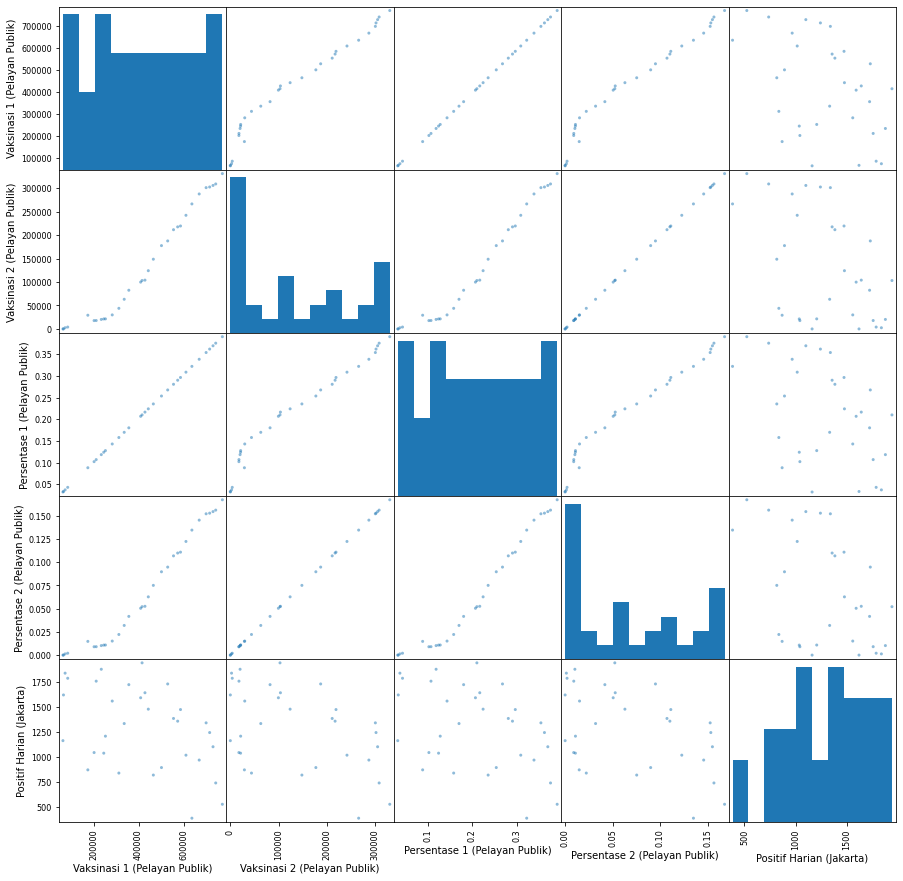

In [49]:
scatter_matrix(merged_dataset_2_3_train, figsize=(15, 15))

<font face="verdana">Visualisasi matriks korelasi dan scatter plot matrix untuk merged_dataset_2_2_train berdasarkan section Total</font>

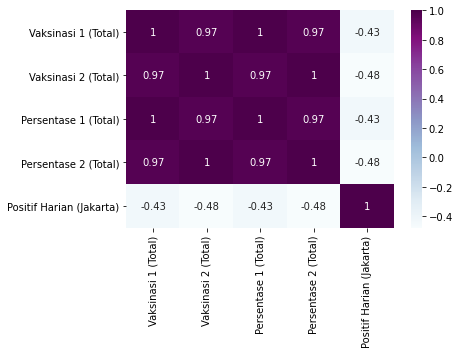

In [50]:
corr_mat_5 = merged_dataset_2_4_train.corr()
dataplot_4 = sns.heatmap(corr_mat_5, cmap="BuPu", annot=True)

In [51]:
corr_mat_5['Positif Harian (Jakarta)'].sort_values(ascending=True)

Persentase 2 (Total)       -0.477607
Vaksinasi 2 (Total)        -0.477607
Vaksinasi 1 (Total)        -0.425769
Persentase 1 (Total)       -0.425769
Positif Harian (Jakarta)    1.000000
Name: Positif Harian (Jakarta), dtype: float64

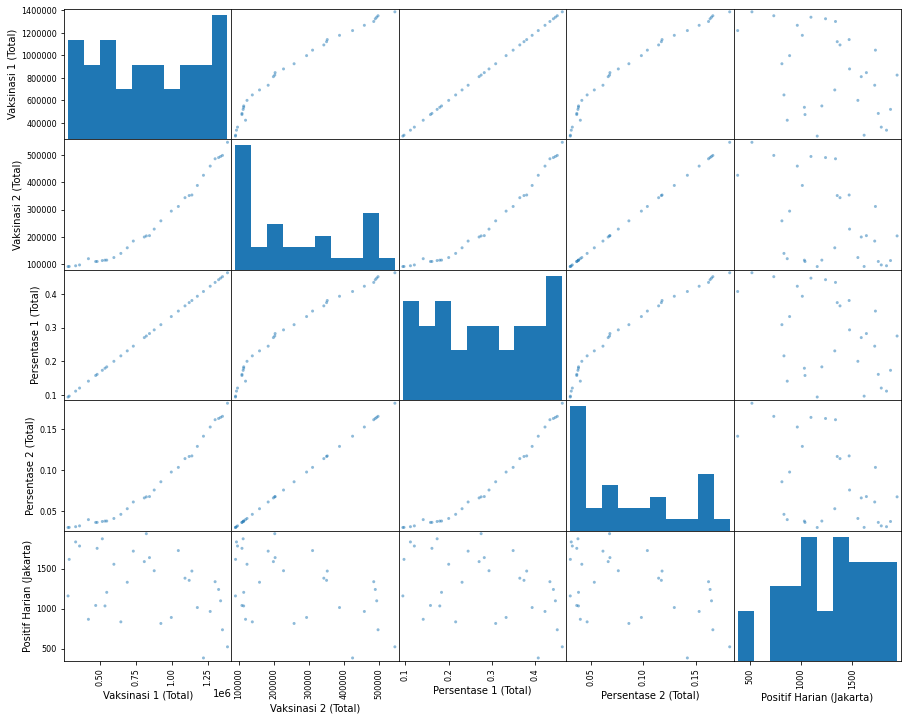

In [52]:
scatter_matrix(merged_dataset_2_4_train, figsize=(15, 12))

<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Berdasarkan matriks korelasi dan scatter plot matrix, variabel yang memiliki korelasi terbesar terhadap pertumbuhan Positif Harian (Jakarta) adalah kolom Persentase 2 (Lansia) dan Vaksinasi 2 (Lansia) dengan nilai yang sama sebesar -0.5127.

<h1>No. 3</h1>

<font face="verdana">Akan dilakukan pembuatan model regresi berdasarkan data pada langkah sebelumnya, yaitu langkah no. 2. Model-model machine learning yang akan digunakan adalah Decision Tree Regressor, Gradient Boost, dan Random Forest Regressor.

Import model machine learning dan mengisi parameter/restriction

Karena terdapat 2 input data dengan fitur yang berbeda, akan dibuat dua model untuk masing-masing model yang didedikasikan untuk setiap input.</font>

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

tree_reg_1 = DecisionTreeRegressor(max_depth=5, random_state=42, min_samples_leaf=2)
grd_reg_1 = GradientBoostingRegressor(learning_rate=0.1, random_state=42, n_estimators=35)
rnd_reg_1 = RandomForestRegressor(max_depth=5, random_state=42, n_estimators=10)

tree_reg_2 = DecisionTreeRegressor(max_depth=6, random_state=42)
grd_reg_2 = GradientBoostingRegressor(learning_rate=0.2, random_state=42, n_estimators=25)
rnd_reg_2 = RandomForestRegressor(max_depth=6, random_state=42, n_estimators=10)

<font face="verdana">Dataset 1: Gabungan beberapa kolom dari dataset RDT Ag dengan kolom Positif Harian (Jakarta)</br>
Dataset 2: Gabungan beberapa kolom dari dataset Vaksinasi dengan kolom Positif Harian (Jakarta)</br></br>

Memisahkan dataset 1 dan 2 menjadi train set dan test set. Untuk dataset 1, diambil setiap baris dari kolom Positivity Rate Harian sebagai X dan setiap baris dari kolom Positif Harian (Jakarta) sebagai Y. Untuk dataset 2, diambil setiap baris dari kolom Persentase 2 (Lansia) sebagai X dan setiap baris dari kolom Positif Harian (Jakarta) sebagai Y.</font>


In [54]:
X_train_1 = merged_dataset_1_train.iloc[0:,[2]]  # Positivity Rate Harian
X_test_1 = merged_dataset_1_test.iloc[0:,[2]]  # Positivity Rate Harian
Y_train_1 = merged_dataset_1_train.iloc[0:,3]  # Positif Harian (Jakarta)
Y_test_1 = merged_dataset_1_test.iloc[0:,3]  # Positif Harian (Jakarta)

X_train_2 = merged_dataset_2_complete_train.iloc[0:,[5]]  # Persentase 2 (Lansia)
X_test_2 = merged_dataset_2_complete_test.iloc[0:,[5]]  # Persentase 2 (Lansia)
Y_train_2 = merged_dataset_2_complete_train.iloc[0:,16]  # Positif Harian (Jakarta)
Y_test_2 = merged_dataset_2_complete_test.iloc[0:,16]  # Positif Harian (Jakarta)

In [55]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.fit_transform(X_test_1)
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.fit_transform(X_test_2)

<font face="verdana">Model fitting untuk kasus regresi pada dataset 1 dan 2 menggunakan Decision Tree, Gradient Boost, dan Random Forest</font>

In [56]:
tree_reg_1.fit(X_train_1, Y_train_1)
grd_reg_1.fit(X_train_1, Y_train_1)
rnd_reg_1.fit(X_train_1, Y_train_1)

tree_reg_2.fit(X_train_2, Y_train_2)
grd_reg_2.fit(X_train_2, Y_train_2)
rnd_reg_2.fit(X_train_2, Y_train_2)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=42)

<font face="verdana">Membuat fungsi untuk melakukan prediksi Positif Harian (Jakarta)</font>

In [57]:
def plot_regression_predictions(reg, X, y, axes=[-2, 2, 0, 2000]):
    x1 = np.linspace(axes[0], axes[1], 300).reshape(-1, 1)
    y_pred = reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("Positivity Rate Harian", fontsize=13)
    plt.ylabel("Positif Harian (Jakarta)", fontsize=13)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

def plot_regression_predictions_2(reg, X, y, axes=[-1, 2, 0, 2000]):
    x1 = np.linspace(axes[0], axes[1], 300).reshape(-1, 1)
    y_pred = reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("Persentase 2 (Lansia)", fontsize=13)
    plt.ylabel("Positif Harian (Jakarta)", fontsize=13)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

<h2>Visualisasi data 

<font face="verdana">Memvisualisasikan prediksi Positif Harian (Jakarta) berdasarkan Positivity Rate Harian</font>

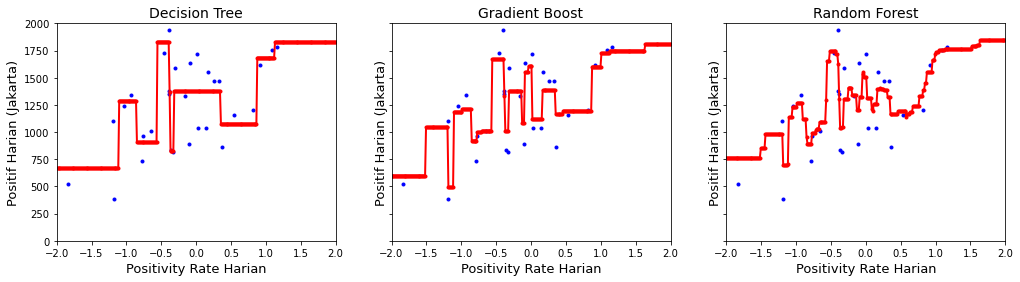

In [58]:
import numpy as np
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), sharey='all')

plt.sca(axes[0])
plot_regression_predictions(tree_reg_1, X_train_1, Y_train_1)
plt.title("Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(grd_reg_1, X_train_1, Y_train_1)
plt.title("Gradient Boost", fontsize=14)

plt.sca(axes[2])
plot_regression_predictions(rnd_reg_1, X_train_1, Y_train_1)
plt.title("Random Forest", fontsize=14)
plt.show()

<font face="verdana">Mengkalkulasi model machine learning. Model dengan skor tertinggi adalah Gradient Boost

In [59]:
print('Decision Tree:',tree_reg_1.score(X_train_1, Y_train_1),'\n',
      'Gradient Boost:',grd_reg_1.score(X_train_1, Y_train_1),'\n',
      'Random Forest:', rnd_reg_1.score(X_train_1, Y_train_1))

Decision Tree: 0.7721696547136302 
 Gradient Boost: 0.9092589323014522 
 Random Forest: 0.802083938427817


<font face="verdana">Memvisualisasikan prediksi Positif Harian (Jakarta) berdasarkan Persentase 2 (Lansia)

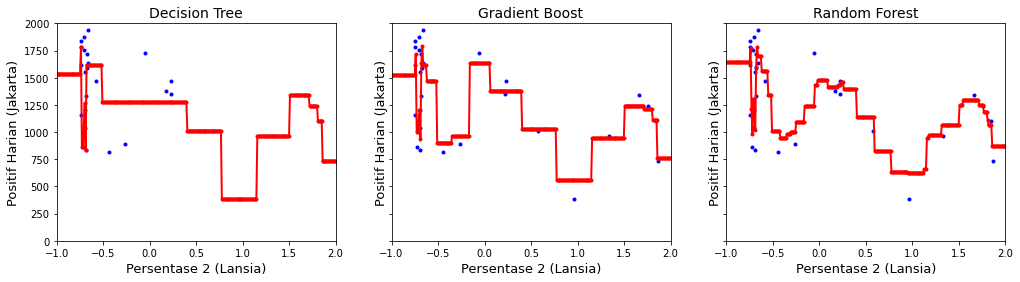

In [60]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), sharey='all')

plt.sca(axes[0])
plot_regression_predictions_2(tree_reg_2, X_train_2, Y_train_2)
plt.title("Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions_2(grd_reg_2, X_train_2, Y_train_2)
plt.title("Gradient Boost", fontsize=14)

plt.sca(axes[2])
plot_regression_predictions_2(rnd_reg_2, X_train_2, Y_train_2)
plt.title("Random Forest", fontsize=14)
plt.show()

Mengkalkulasi skor ketiga model machine learning di atas. Model dengan skor tertinggi adalah Gradient Boost

In [61]:
print('Decision Tree:', tree_reg_2.score(X_train_2, Y_train_2),'\n',
      'Gradient Boost:', grd_reg_2.score(X_train_2, Y_train_2),'\n',
      'Random Forest:', rnd_reg_2.score(X_train_2, Y_train_2))

Decision Tree: 0.7672763045353985 
 Gradient Boost: 0.9159651972196317 
 Random Forest: 0.7861065927895644


<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Berdasarkan skor dari tiap model machine learning, skor tertinggi (max: 1) dicapai oleh model Gradient Boost dengan nilai 0.9159. <br><br>
Pada dasarnya, skor tiap model dipengaruhi oleh parameter/restriction yang sudah ditentukan. Ketika salah satu parameter/restriction diubah nilainya, performa model dalam memprediksi dapat berubah menjadi lebih baik atau lebih buruk.
Untuk menghindari over-fitting dan under-fitting, maka kami menentukan batas skor model agar berkisar antara 0.75 sampai 0.95. Dengan demikian, nilai parameter diubah-ubah (tuning) hingga memperoleh skor yang berada dalam range tersebut.

<h1>No. 4</h1>

<font face="verdana">Akan dilakukan pembuatan model regresi seperti pada langkah 3 dengan menggunakan PCA.

Dataset 1: Gabungan beberapa kolom dari dataset RDT Ag dengan kolom Positif Harian (Jakarta)</br>
Dataset 2: Gabungan beberapa kolom dari dataset Vaksinasi dengan kolom Positif Harian (Jakarta)</br></br>

Model fitting untuk dataset 1 dan 2 menggunakan PCA

In [62]:
from sklearn.decomposition import PCA
pca = PCA()

X_train_1 = pca.fit_transform(X_train_1)  # Positivity Rate Harian
X_test_1 = pca.transform(X_test_1)  # Positivity Rate Harian

X_train_2 = pca.fit_transform(X_train_2)  # Persentase 2 (Lansia)
X_test_2 = pca.transform(X_test_2)  # Persentase 2 (Lansia)

In [63]:
grd_reg_1.fit(X_train_1, Y_train_1)
grd_reg_2.fit(X_train_2, Y_train_2)

Y_pred_pca_1 = grd_reg_1.predict(X_train_1)
Y_pred_pca_2 = grd_reg_2.predict(X_train_2)

<font face="verdana">Memvisualisasikan prediksi Positif Harian (Jakarta) dengan model PCA berdasarkan Positivity Rate Harian dan Persentase 2 (Lansia)</font>

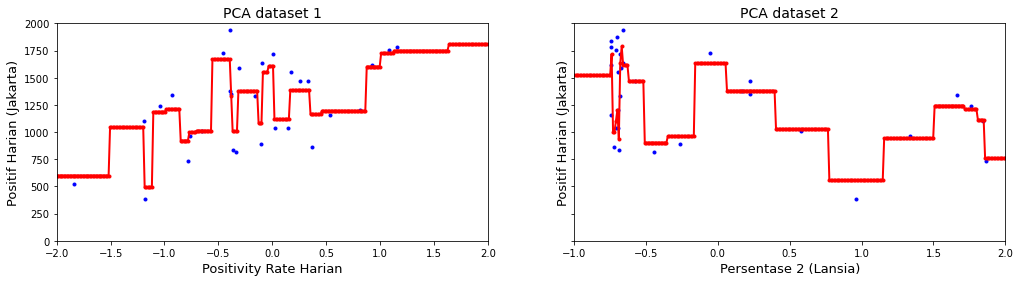

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), sharey='all')

plt.sca(axes[0])
plot_regression_predictions(grd_reg_1, X_train_1, Y_train_1)
plt.title("PCA dataset 1", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions_2(grd_reg_2, X_train_2, Y_train_2)
plt.title("PCA dataset 2", fontsize=14)

<font face="verdana">Mengkalkulasi skor model PCA</font>

In [65]:
print('PCA dataset 1:', grd_reg_1.score(X_train_1, Y_train_1), '\n',
      'PCA dataset 2:', grd_reg_2.score(X_train_2, Y_train_2))

PCA dataset 1: 0.9092589323014522 
 PCA dataset 2: 0.9159651972196317


<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Berdasarkan plot dan skor, dapat dilihat bahwa model Gradient Boost setelah difit ke algoritma PCA dengan model Gradient Boost sebelum difit ke algoritma PCA (No. 3) adalah sama.

Pada dasarnya algoritma PCA bertujuan untuk mereduksi dimensi fitur untuk mensimplifikasi dataset dapat digunakan untuk memprediksi dengan lebih baik. Ketika fitur input berjumlah sangat banyak, maka tahap prediksi akan lebih challenging bagi model sehingga performa model untuk memprediksi dapat menurun, hal ini disebut sebagai curse of dimensionality.

Sama seperti langkah sebelumnya, kami hanya menggunakan 1 fitur untuk kedua dataset. Artinya tiap dataset hanya memiliki 1 dimensi. Inilah mengapa ketika difit ke algoritma PCA, tidak terjadi perubahan apapun. Fitur yang dari awal hanya berbentuk 1 dimensi tidak bisa direduksi lagi dimensinya oleh algoritma PCA. 

Sehingga, model terbaik adalah tetap Gradient Boost, baik yang sebelum difit ke algoritma PCA maupun yang sesudah difit ke algoritma PCA.

<h1>No. 5</h1>

<h2>Menambahkan Fitur</h2>

<font face="verdana">Menambahkan satu fitur/kolom baru dengan nama Kelas. Kolom tersebut membagi nilai dari kolom Positivity Rate menjadi 3 kategori. </br></br>
Jika nilai kolom Positivity Rate kurang dari 3,3%, maka kolom Kelas diberi nilai 0. Jika nilai kolom Positivity Rate kurang dari 5%, maka kolom Kelas diberi nilai 2. Kemudian sisanya diberi nilai 1</font>

In [66]:
merged_dataset_1_train['Kelas'] = 0
merged_dataset_1_test['Kelas'] = 0

for i in range(len(merged_dataset_1_train)):
    if merged_dataset_1_train['Positivity Rate Harian'][i] < 0.033:
        merged_dataset_1_train['Kelas'][i] = 0
    elif merged_dataset_1_train['Positivity Rate Harian'][i] > 0.05:
        merged_dataset_1_train['Kelas'][i] = 2 
    else:
        merged_dataset_1_train['Kelas'][i] = 1

for i in range(len(merged_dataset_1_test)):
    if merged_dataset_1_test['Positivity Rate Harian'][i] < 0.033:
        merged_dataset_1_test['Kelas'][i] = 0
    elif merged_dataset_1_test['Positivity Rate Harian'][i] > 0.05:
        merged_dataset_1_test['Kelas'][i] = 2 
    else:
        merged_dataset_1_test['Kelas'][i] = 1

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

<h1>No. 6</h1>

<h2>Membuat Model</h2>

<font face="verdana"> Membuat model klasifikasi berdasarkan fitur "Kelas" yang dibentuk pada langkah no. 5 sebelumnya. Model klasifikasi yang akan digunakan adalah Ensemble Learning dengan menggunakan Voting Classifier. Perbandingan model klasifikasi yang akan dilakukan adalah antara Random Forest Classifier dan Logistic Regression. Kemudian akan model Ensemble Learning itu akan dibandingkan lagi dengan model klasifikasi menggunakan AdaBoost.

Import model machine learning dan mengisi parameter/restriction untuk melakukan ensemble learning menggunakan Voting Classifier.

Menambahkan model machine learning Random Forest dan Logistic Regression ke dalam Voting Classifier untuk mencari model yang terbaik.

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

rnd_clf = RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)
log_clf = LogisticRegression(solver='liblinear', random_state=42)
voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf),('log', log_clf)], voting='hard')

<font face="verdana">Membagi dataset 1 menjadi train set dan test set. Diambil setiap baris dari kolom Tes Harian dan Positif Harian (Jakarta) sebagai X dan setiap baris dari kolom Kelas sebagai Y.</font>

In [68]:
X_train_3 = merged_dataset_1_train.iloc[0:,[0,3]]  # Tes Harian, Positif Harian (Jakarta)
X_test_3 = merged_dataset_1_test.iloc[0:,[0,3]]  # Tes Harian, Positif Harian (Jakarta)
Y_train_3 = merged_dataset_1_train.iloc[0:,4]  # Kelas
Y_test_3 = merged_dataset_1_test.iloc[0:,4]  # Kelas

X_train_3 = sc.fit_transform(X_train_3)
X_test_3 = sc.fit_transform(X_test_3)

<font face="verdana">Model fitting untuk ensemble learning menggunakan Voting Classifier</font>

In [69]:
voting_clf.fit(X_train_3, Y_train_3)

VotingClassifier(estimators=[('rnd',
                              RandomForestClassifier(max_depth=2,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('log',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear'))])

<font face="verdana">Mengkalkulasikan accuracy score dari setiap model yang digunakan dalam ensemble learning Voting Classifier. Nilai skor memiliki value 1.0 sebagai nilai terbaik.</font>

In [70]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train_3, Y_train_3)
    y_pred = clf.predict(X_train_3)
    print(clf.__class__.__name__, accuracy_score(Y_train_3, y_pred))

LogisticRegression 0.8125
RandomForestClassifier 0.84375
VotingClassifier 0.84375


<font face="verdana">Import library dan membuat fungsi untuk melakukan visualisasi data</font>

In [71]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 2, -1, 2], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=alpha)
    plt.axis(axes)
    plt.xlabel("Tes Harian, Positif Harian (Jakarta)", fontsize=14)
    plt.ylabel("Kelas", fontsize=14)

<font face="verdana">Model fitting untuk ensemble learning AdaBoost</font>

In [72]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R",
                             learning_rate=0.5, random_state=42)

In [73]:
ada_clf.fit(X_train_3, Y_train_3)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

<font face="verdana">Visualisasi ensemble learning AdaBoost</font>

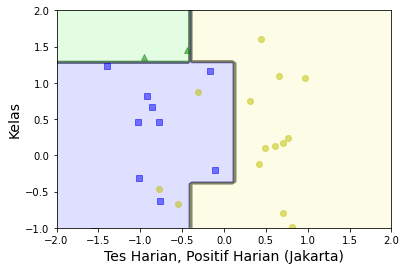

In [74]:
plot_decision_boundary(ada_clf, X_train_3, Y_train_3)

<font face="verdana">Mengkalkulasi accuracy score dari setiap model yang digunakan dalam ensemble learning AdaBoost</font>

In [75]:
Y_pred = ada_clf.predict(X_train_3)
print('AdaBoost:', accuracy_score(Y_train_3, Y_pred))

AdaBoost: 0.875


<font face="verdana"><b>Analisa</b></font><br><br>
<font face="verdana">Untuk ensemble learning Voting Classifier, skornya bernilai 0.8437. Untuk ensemble learning AdaBoost, skornya bernilai 0.875.

Berdasarkan skor di atas, model Decision Tree dengan ensemble learning AdaBoost merupakan model terbaik. Hal ini disebabkan oleh metode boosting dalam AdaBoost yang meningkatkan performa weak learner model menjadi strong learner sehingga hasil prediksi menjadi lebih baik dibandingkan penggunaan model Decision Tree Classifier itu sendiri.</font>

<h1><b>Komitmen Integritas</b></h1>

<font face="verdana">"Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun menerima bantuan apa pun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal maupun jawaban ujian kepada pihak lain."</font>